In [1]:
import scarlet
import galsim
from astropy import wcs as WCS
import time
from mr_tools import galsim_compare_tools as gct

This notebook allows quick visualisation of the results of the interpolation scheme in scarlet and in galsim.

In [2]:
%pylab inline
# Setup: declaring survey properties, loading catalog and making sure we have pretty colorbars
data_dir='/Users/remy/Desktop/LSST_Project/GalSim/examples/data'

HST, EUCLID, ROMAN, HSC, RUBIN = gct.load_surveys()

cat = galsim.COSMOSCatalog(dir=data_dir, file_name = 'real_galaxy_catalog_23.5_example.fits')

mymap = 'gnuplot2'#mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

Populating the interactive namespace from numpy and matplotlib


60 60
Scarlet timing
CPU times: user 30 ms, sys: 6.71 ms, total: 36.7 ms
Wall time: 24.7 ms
Galsim timing
CPU times: user 59.4 ms, sys: 16.4 ms, total: 75.8 ms
Wall time: 13.6 ms
scarlet SDR:  7.538348179124181
galsim SDR:  22.811918506050777


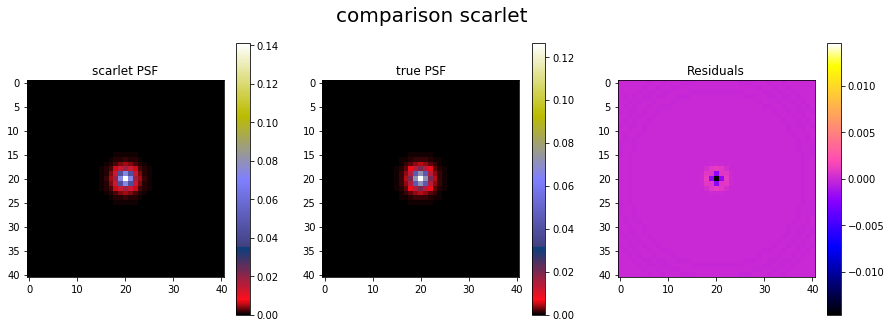

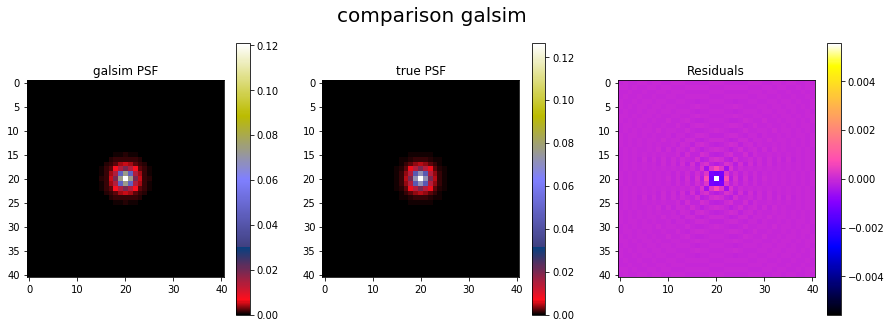

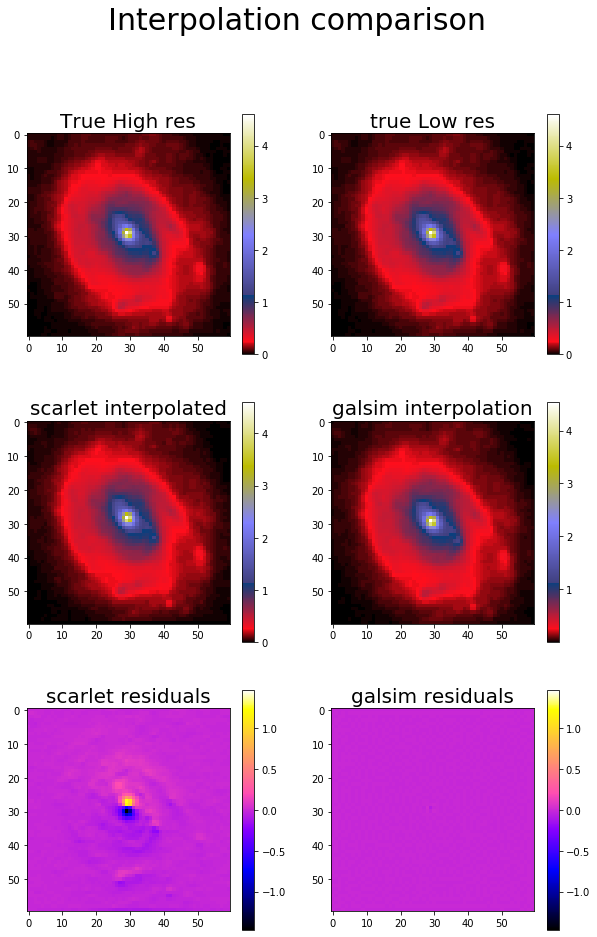

Scarlet timing
CPU times: user 104 ms, sys: 56.3 ms, total: 160 ms
Wall time: 93.2 ms
Galsim timing
CPU times: user 30.2 ms, sys: 27.6 ms, total: 57.8 ms
Wall time: 16.1 ms
scarlet SDR:  6.585623167471201
galsim SDR:  19.898242372774195


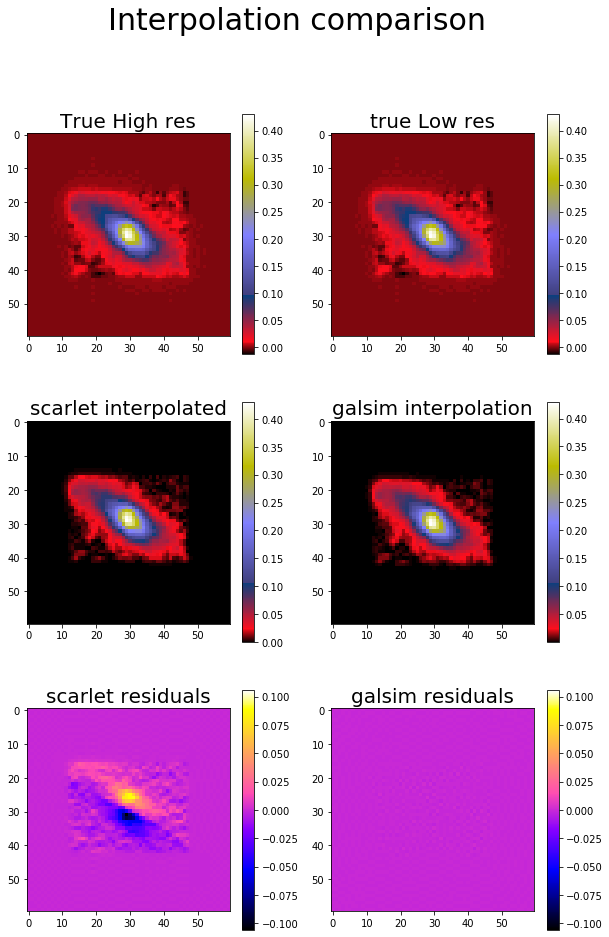

Scarlet timing
CPU times: user 90.3 ms, sys: 60.8 ms, total: 151 ms
Wall time: 97.3 ms
Galsim timing
CPU times: user 53.9 ms, sys: 24.5 ms, total: 78.4 ms
Wall time: 15.3 ms
scarlet SDR:  3.938513346181171
galsim SDR:  19.69010713423922


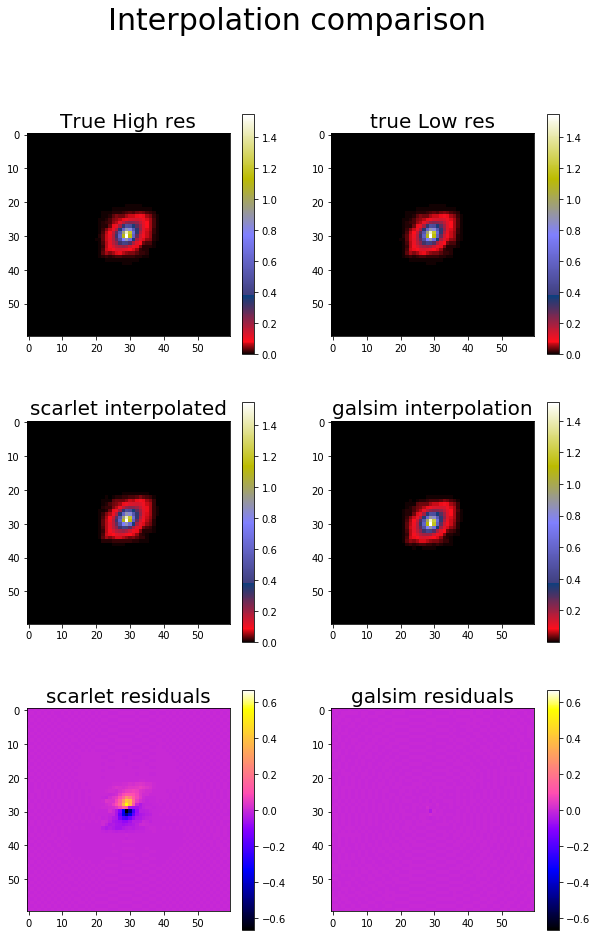

Scarlet timing
CPU times: user 149 ms, sys: 108 ms, total: 257 ms
Wall time: 159 ms
Galsim timing
CPU times: user 202 ms, sys: 106 ms, total: 307 ms
Wall time: 73.8 ms
scarlet SDR:  5.123730719110286
galsim SDR:  19.409145445819146


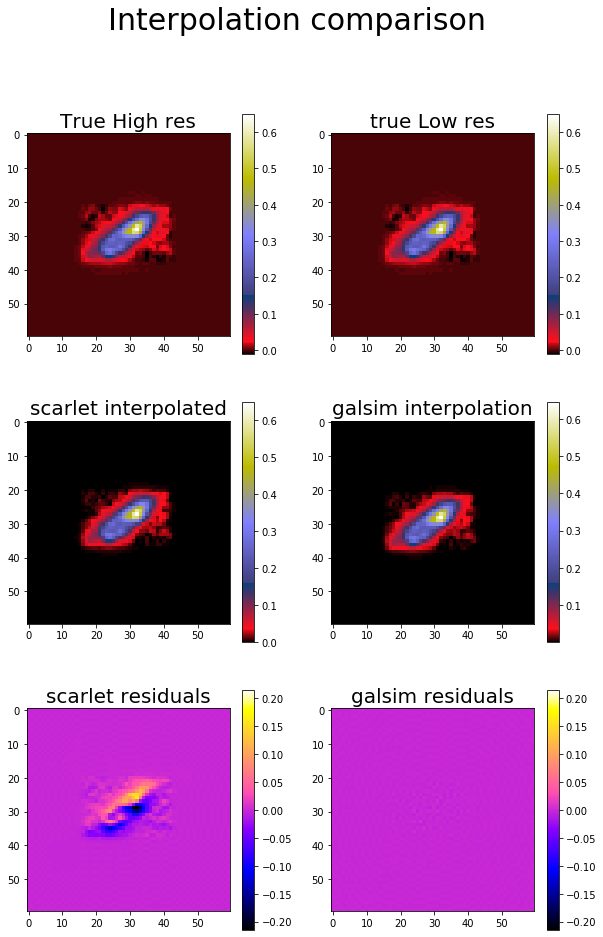

Scarlet timing
CPU times: user 84 ms, sys: 42.2 ms, total: 126 ms
Wall time: 68.9 ms
Galsim timing
CPU times: user 38.4 ms, sys: 23.9 ms, total: 62.2 ms
Wall time: 17.6 ms
scarlet SDR:  5.013765926398302
galsim SDR:  20.029287308380418


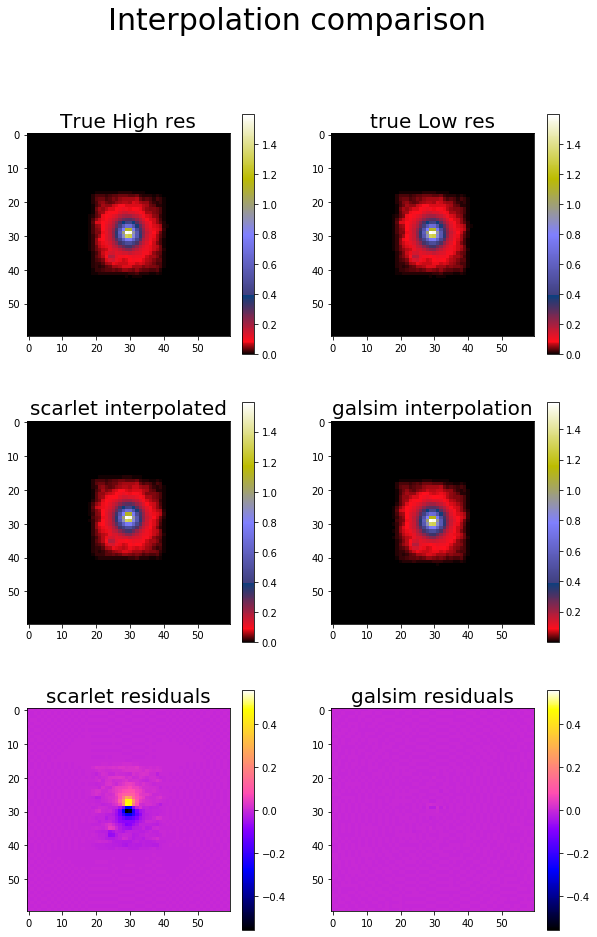

Scarlet timing
CPU times: user 69 ms, sys: 28.7 ms, total: 97.7 ms
Wall time: 46 ms
Galsim timing
CPU times: user 62.3 ms, sys: 28.1 ms, total: 90.4 ms
Wall time: 18.6 ms
scarlet SDR:  6.286757121448092
galsim SDR:  15.797448344346963


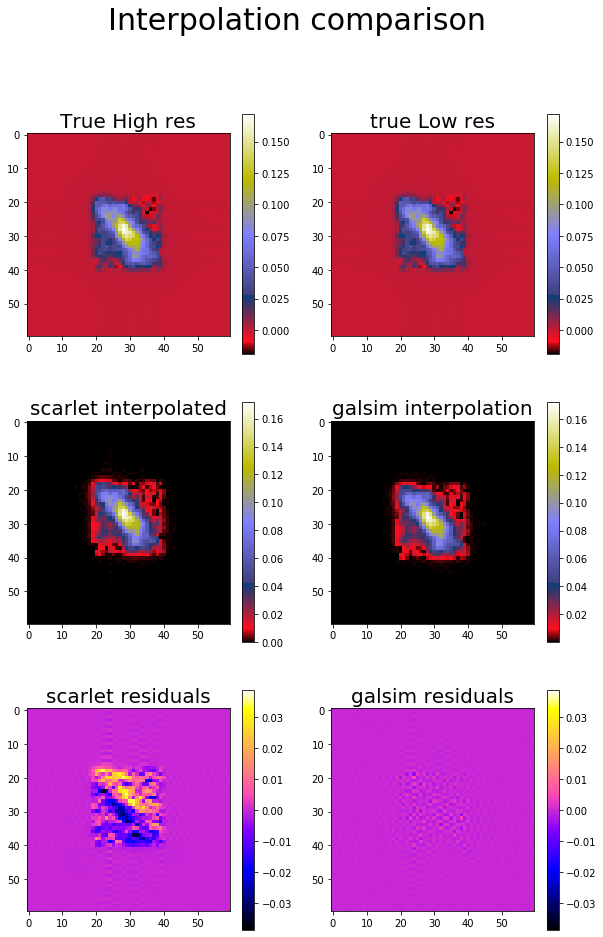

Scarlet timing
CPU times: user 92.3 ms, sys: 52.7 ms, total: 145 ms
Wall time: 79.9 ms
Galsim timing
CPU times: user 57.8 ms, sys: 32.4 ms, total: 90.1 ms
Wall time: 18.3 ms
scarlet SDR:  3.0806881895151554
galsim SDR:  17.376829212817956


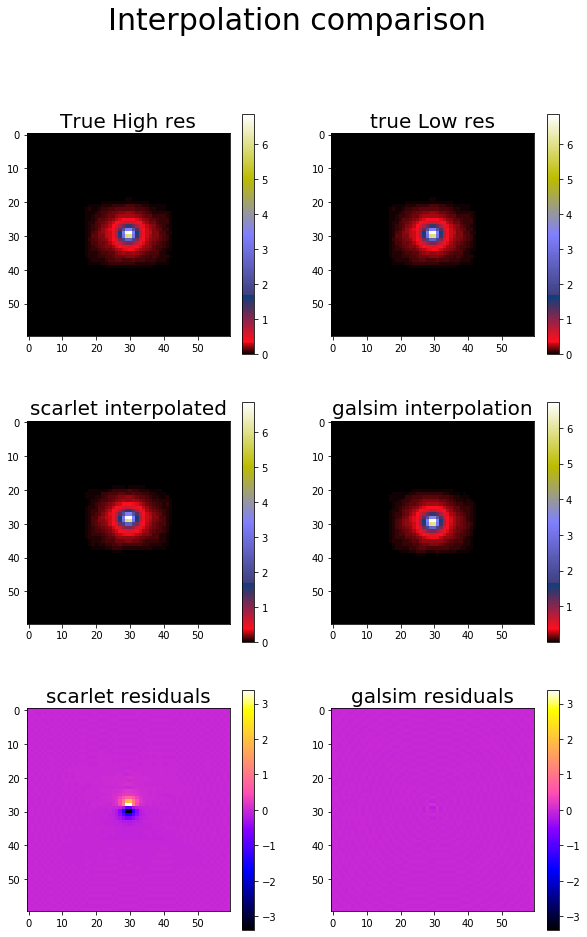

Scarlet timing
CPU times: user 67.4 ms, sys: 25.4 ms, total: 92.8 ms
Wall time: 43.8 ms
Galsim timing
CPU times: user 44.5 ms, sys: 27.8 ms, total: 72.3 ms
Wall time: 15 ms
scarlet SDR:  5.738751988043678
galsim SDR:  20.378861718014477


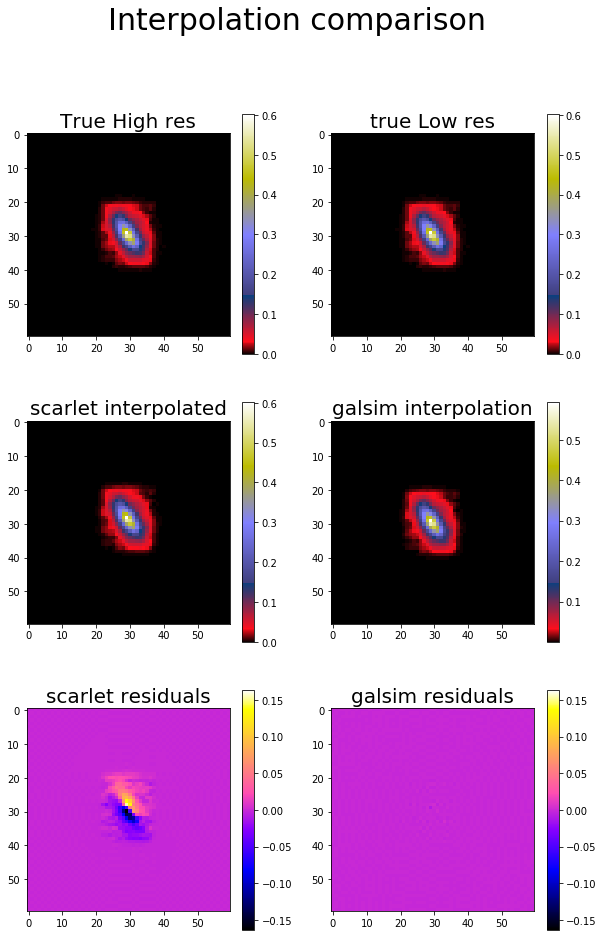

Scarlet timing
CPU times: user 59.2 ms, sys: 21.8 ms, total: 81 ms
Wall time: 38.1 ms
Galsim timing
CPU times: user 50.4 ms, sys: 20.8 ms, total: 71.1 ms
Wall time: 13.4 ms
scarlet SDR:  8.054553392459102
galsim SDR:  22.50471696063659


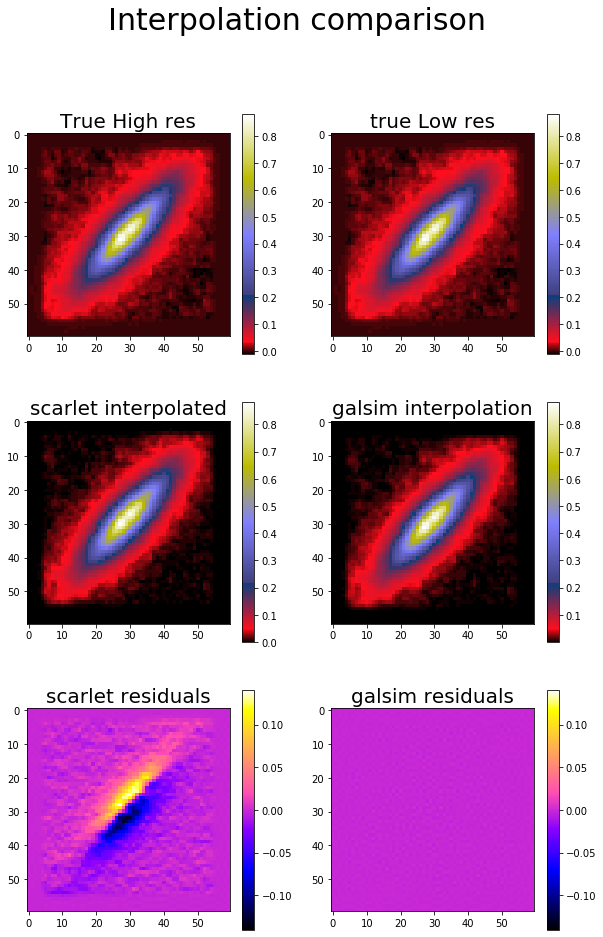

Scarlet timing
CPU times: user 89.7 ms, sys: 71 ms, total: 161 ms
Wall time: 83.5 ms
Galsim timing
CPU times: user 43.9 ms, sys: 10.2 ms, total: 54.1 ms
Wall time: 9.36 ms
scarlet SDR:  5.09840437911754
galsim SDR:  20.565382281935722


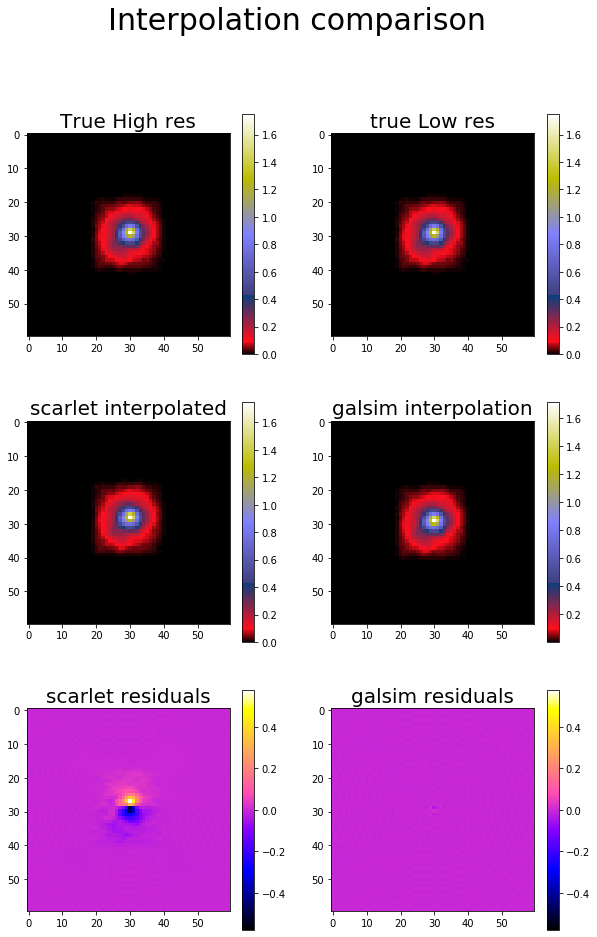

Scarlet timing
CPU times: user 60 ms, sys: 23.6 ms, total: 83.6 ms
Wall time: 38.9 ms
Galsim timing
CPU times: user 52.3 ms, sys: 14.3 ms, total: 66.6 ms
Wall time: 11.9 ms
scarlet SDR:  6.344882386648725
galsim SDR:  21.348932870809406


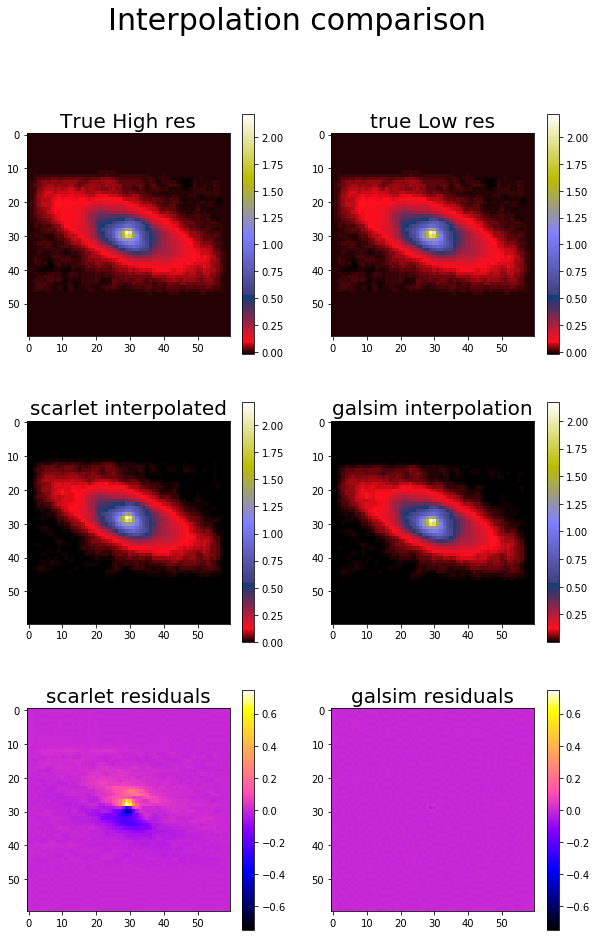

In [3]:
# Choose to surveys to match
survey_hr = EUCLID
survey_lr = EUCLID

# PSF size (pixels)
npsf = 41

# The low resolution image will span the same physical area
n_lr = 60#np.int(n_hr*survey_hr['pixel']/survey_lr['pixel'])+1
n_hr = np.int(np.around(n_lr*survey_lr['pixel']/survey_hr['pixel'], decimals = 3))
print(n_lr, n_hr)
# Channel names (scarlet-specific)
channel_hr = ['hr']
channel_lr = ['lr']
channels = channel_lr+channel_hr
c = 0
for i in range(39,50): 
    # Make the simulations
    data_hr, data_lr, wcs_hr, wcs_lr, psf_hr, psf_lr, angle,_, _ = gct.mk_sim(i, survey_hr, survey_lr, 
                                                         (n_hr, n_hr), (n_lr, n_lr), 
                                                         npsf, cat, gal_type = 'real', smooth = False)
    
    ref = wcs_hr.wcs.crval.reshape((1,2))
    
    # Setup scarlet
    if c == 0:
        obs_lr, obs_hr = gct.setup_scarlet(data_hr, data_lr, wcs_hr, wcs_lr, psf_hr, psf_lr, channels, 'intersection')

    # Galsim setup:
    ## Interpolated image from psf_hr for galsim
    psf_hr_galsim = galsim.InterpolatedImage(galsim.Image(psf_hr[0]), 
                                               scale = survey_hr['pixel'])
    ## Deconvolution kernel for diff kernel
    deconv = galsim.Deconvolve(psf_hr_galsim)
    
    ## Interpolation of low resolution psf at high resolution from galsim
    psf_lr_hr = galsim.InterpolatedImage(galsim.Image(psf_lr[0]), 
                                               scale = survey_lr['pixel'])
    ## Difference kernel from galsim
    diff_gal = galsim.Convolve(deconv, psf_lr_hr)
    
    # Run scarlet on simulations:
    print('Scarlet timing')
    %time obs_lr.render(data_hr[None,:,:])
    interp_scar = obs_lr.render(data_hr[None,:,:])
    #interp_scar[interp_scar<0] = 0

    # Difference kernel from scarlet (for sanity checks)
    diff_scar = obs_lr._diff_kernels
    
    # Run galsim on simlations
    print('Galsim timing')
    %time  gct.interp_galsim(data_hr, data_lr, diff_gal, angle, survey_hr['pixel'], survey_lr['pixel'])
    interp_gal = gct.interp_galsim(data_hr, data_lr, diff_gal, angle, survey_hr['pixel'], survey_lr['pixel'])
    
    # Check on the reconstruction of the PSF
    ## Reconstruction of the low resolution psf by galsim from hr psf and diff kernel (sanity check)
    rec_gal = galsim.Convolve(diff_gal, psf_hr_galsim).drawImage(nx=npsf,ny=npsf, scale=survey_hr['pixel'])
    
    ## True psf
    gal_lr = galsim.InterpolatedImage(galsim.Image(psf_lr[0]), 
                                      scale=survey_lr['pixel']).drawImage(nx=npsf,ny=npsf,scale=survey_hr['pixel']
                                                                         , method = 'real_space')
    
    ## Reconstruction of the low resolution psf by SCARLET from hr psf and diff kernl (sanity check)
    rec_scar = scarlet.fft.convolve(scarlet.fft.Fourier(psf_hr[0]), scarlet.fft.Fourier(diff_scar.image[0]))
    
    if c == 0:
        # Comparisonbetween scarlet and galsim of the reconstruction of the low resolution PSF at high resolution 
        r_scar=(gal_lr.array-rec_scar.image)
        figure(figsize = (15,5))
        plt.suptitle('comparison scarlet', fontsize = 20)
        subplot(131)
        title('scarlet PSF')
        imshow((rec_scar.image))
        plt.colorbar()
        subplot(132)
        title('true PSF')
        imshow((gal_lr.array))
        plt.colorbar()
        subplot(133)
        title('Residuals')
        imshow((r_scar), cmap = mymap, 
               vmin = -np.max(np.abs(r_scar)), vmax = np.max(np.abs(r_scar)))
        plt.colorbar()

        r_gal = (gal_lr.array-rec_gal.array)
        figure(figsize = (15,5))
        plt.suptitle('comparison galsim', fontsize = 20)
        subplot(131)
        title('galsim PSF')
        imshow((rec_gal.array))
        plt.colorbar()
        subplot(132)
        title('true PSF')
        imshow((gal_lr.array))
        plt.colorbar()
        subplot(133)
        title('Residuals')
        imshow((r_gal), cmap = mymap, 
               vmin = -np.max(np.max(r_gal)), vmax = np.max(np.max(r_gal)))
        plt.colorbar()
    
    
    # Source Distortion Ratio: the high the better
    print('scarlet SDR: ', gct.SDR(data_lr, interp_scar[0]))
    print('galsim SDR: ', gct.SDR(data_lr, interp_gal.array))
    
    # Comparison of the reconstructions 
    gal_res = data_lr-interp_gal.array
    scar_res = data_lr-interp_scar[0]
    figure(figsize = (10,15))
    plt.suptitle('Interpolation comparison', fontsize=30)
    subplot(321)
    title('True High res', fontsize = 20)
    imshow((data_hr))
    plt.colorbar()
    subplot(322)
    title('true Low res', fontsize = 20)
    imshow((data_lr))
    plt.colorbar()
    subplot(323)
    title('scarlet interpolated', fontsize = 20)
    imshow(np.abs(interp_scar[0]))
    plt.colorbar()
    subplot(324)
    title('galsim interpolation', fontsize = 20)
    imshow(np.abs(interp_gal.array))
    plt.colorbar()
    subplot(325)
    title('scarlet residuals', fontsize = 20)
    imshow(-(scar_res), cmap=mymap, vmin = -np.max(np.abs(scar_res)), vmax = np.max(np.abs(scar_res)))
    plt.colorbar()
    subplot(326)
    title('galsim residuals', fontsize = 20)
    imshow(-(gal_res), cmap=mymap, vmin = -np.max(np.abs(scar_res)), vmax = np.max(np.abs(scar_res)))
    plt.colorbar()
    show()
    
    c+=1


In [4]:

High = {'name': 'High', 'pixel': 0.06,'psf': 0.06, 'channels': ['f814w']}
Convolved = {'name': 'Conv', 'pixel': 0.06,'psf': 0.3, 'channels': ['f814w']}
Low = {'name': 'Low', 'pixel': 0.2,'psf': 0.3, 'channels': ['f814w']}

n_lr = 40#np.int(n_hr*survey_hr['pixel']/survey_lr['pixel'])+1
n_hr = np.int(np.around(n_lr*Low['pixel']/High['pixel'], decimals = 3))
print(n_hr)

data_hr, data_lr, wcs_hr, wcs_lr, psf_hr, psf_lr, angle,_,_ = gct.mk_sim(39, High, Convolved, 
                                                         (n_hr, n_hr), (n_hr, n_hr), 
                                                         npsf, cat, gal_type = 'real', smooth = True)
hr2, lr2, wcs_hr2, wcs_lr2, psf_hr, psf_lr, angle,_,_ = gct.mk_sim(39, High, Low, 
                                                         (n_hr, n_hr), (n_lr, n_lr), 
                                                         npsf, cat, gal_type = 'real', smooth = True)

data_hr = data_hr[None, :,:]


133


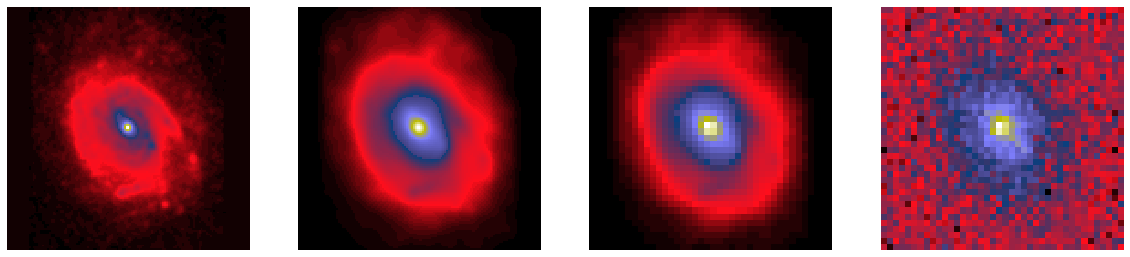

In [5]:
plt.figure(figsize = (20,40))
plt.subplot(141)
plt.imshow((data_hr[0]))
plt.axis('off')
plt.subplot(142)
plt.imshow((data_lr))
plt.axis('off')
plt.subplot(143)
plt.imshow((lr2))
plt.axis('off')
plt.subplot(144)
plt.imshow((lr2+np.random.randn(*np.shape(lr2))/2.))
plt.axis('off')
plt.show()



In [6]:
data_hr2, _, _, data_lr, psf_hr, psf_lr, angle, _, _ = gct.mk_sim(39, High, Convolved, 
                                                          (n_hr, n_hr), (n_hr, n_hr), 
                                                         npsf, cat, gal_type = 'parametric', smooth = True)
hr3, lr3, _, _, psf_hr, psf_lr, angle, _, _ = gct.mk_sim(39, High, Low, 
                                                         (n_hr, n_hr), (n_lr, n_lr), 
                                                         npsf, cat, gal_type = 'parametric', smooth = True)

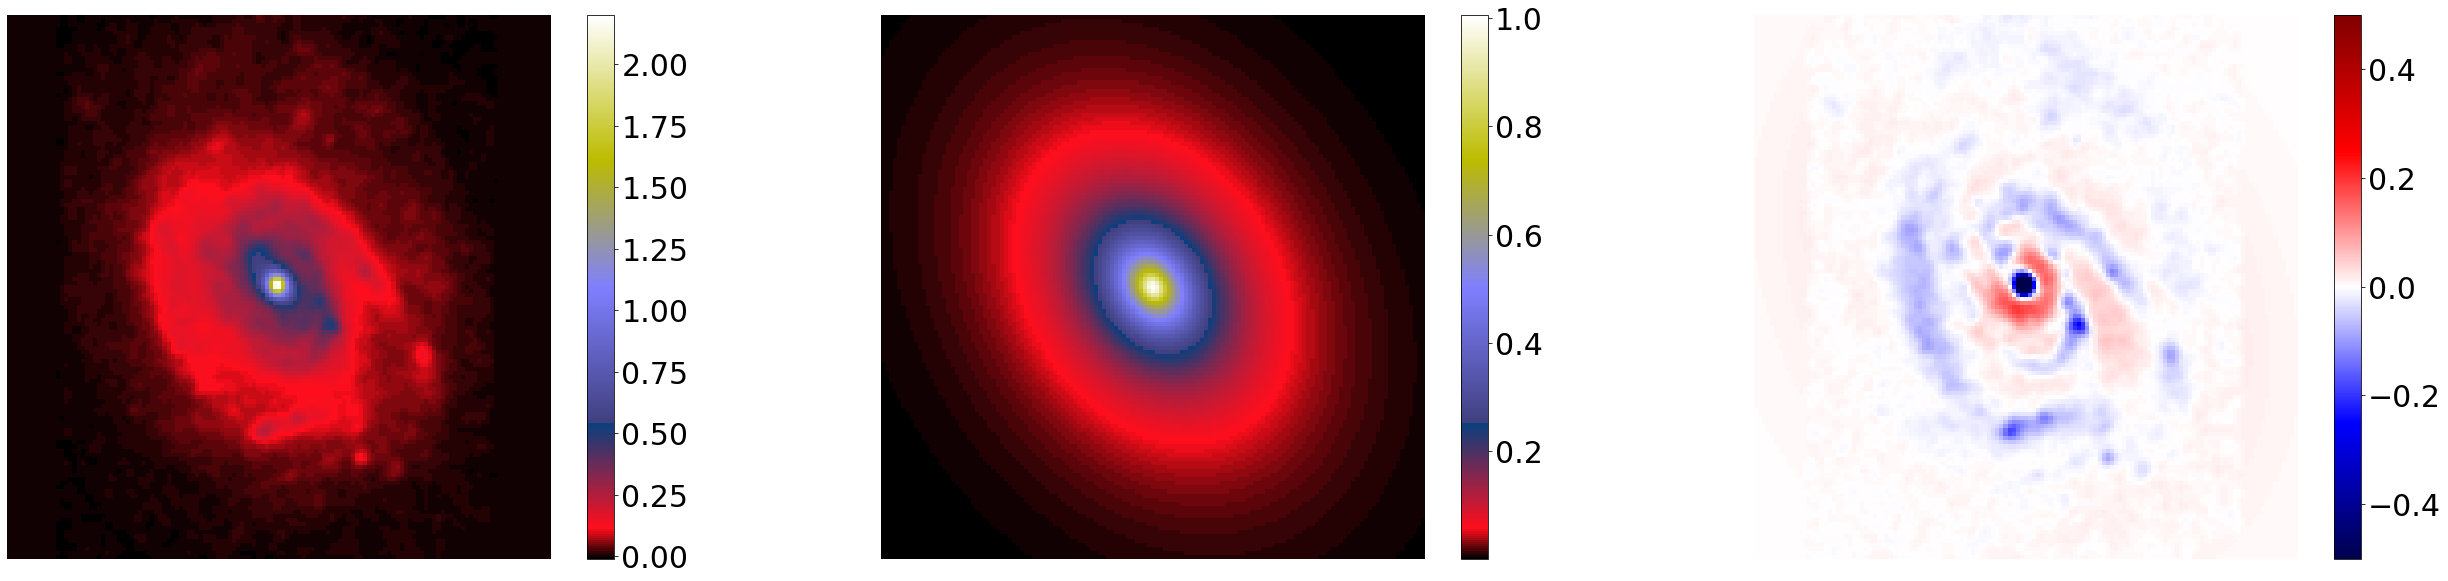

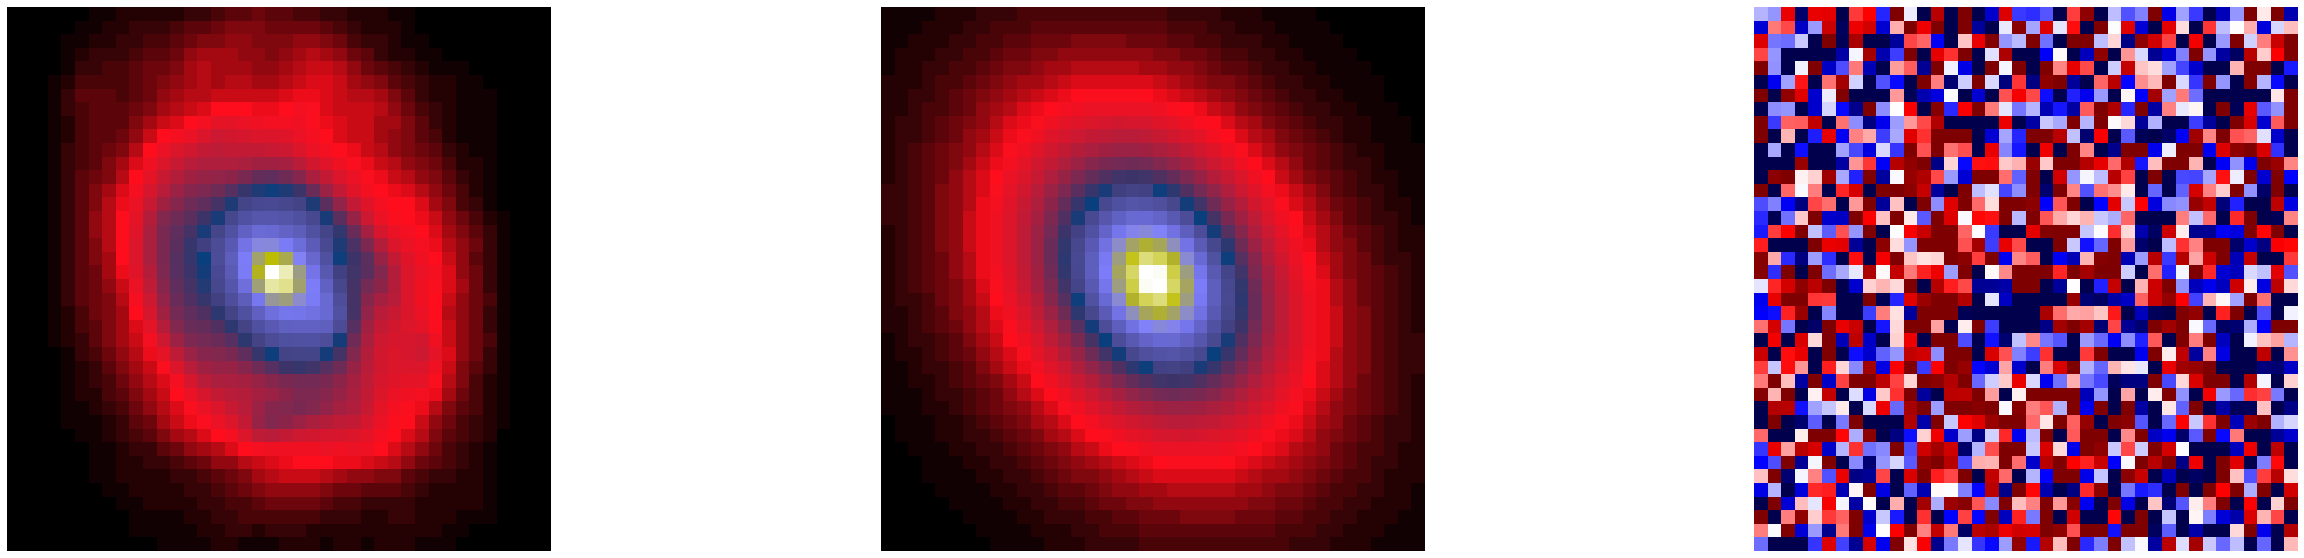

In [7]:
plt.figure(figsize = (60,10))
plt.subplot(141)
plt.imshow((data_hr[0]))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30)
plt.axis('off')
plt.subplot(142)
plt.imshow((data_hr2))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30)
plt.axis('off')
plt.subplot(143)
plt.imshow((data_hr2-data_hr[0]), cmap = 'seismic', vmin = -0.5, vmax = 0.5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30) 
plt.axis('off')
plt.show()

plt.figure(figsize = (60,10))
plt.subplot(141)
plt.imshow((lr2))
cb.ax.tick_params(labelsize=30)
plt.axis('off')
plt.subplot(142)
plt.imshow((lr3))
cb.ax.tick_params(labelsize=30)
plt.axis('off')
plt.subplot(143)
plt.imshow((lr2+np.random.randn(*np.shape(lr2))/2.-lr3), cmap = 'seismic', vmin = -0.5, vmax = 0.5)
cb.ax.tick_params(labelsize=30) 
plt.axis('off')
plt.show()

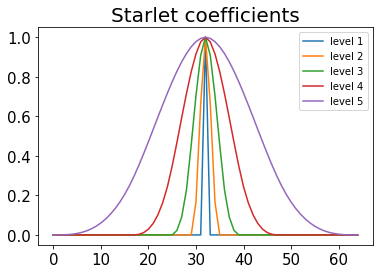

In [8]:
import scipy as scp
z = np.zeros((65, 65))
starz = scarlet.Starlet(z).coefficients
ax1 = plt.figure(1).subplots(1, 1)
#ax2 = plt.figure(2).subplots(1, 1)
for i in range(5):
    strans = np.copy(starz)
    strans[0,i, 32, 32] = 1
    coeff = scarlet.Starlet(coefficients = strans).image
    
    ax1.set_title('Starlet coefficients', fontsize = 20)
    ax1.plot(coeff[0,32,:]/np.max(coeff[0,32,:]), label=f'level {str(i+1)}')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    #ax1.axis('off')
    ax1.legend()
    
    
    #ax2.set_title('Starlet coefficients', fontsize = 20)
    #ax2.plot(np.abs(np.fft.fftshift((np.fft.fft(coeff[0,32,:])))), label=f'level {str(i+1)}')
    #ax2.legend()
    
savefig('starlets.png', transparent=1)